# Code to work with optimization over the set of orthogonal matrices

In [1]:
import autograd.numpy as np
import pymanopt
from pymanopt.manifolds import Stiefel
from pymanopt.manifolds import Sphere
from pymanopt import Problem
from pymanopt.solvers import SteepestDescent
from pymanopt.solvers import ConjugateGradient
from pymanopt.solvers import TrustRegions

from janelia_core.visualization.matrix_visualization import cmp_n_mats

In [2]:
n_rows = 10
n_cols = 2

In [3]:
# Generate a sparse matrix
m_true = np.random.rand(n_rows, n_cols)
m_true[m_true < .5] = 0

In [4]:
# Generate an orthogonal matrix
o_true = np.random.rand(n_cols, n_cols)
o_true, _, _ = np.linalg.svd(o_true)

In [5]:
# Rotate the sparse matrix
m_true_rot = np.matmul(m_true, o_true)

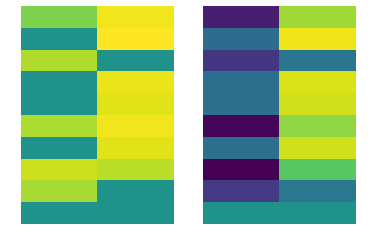

In [6]:
cmp_n_mats([m_true, m_true_rot])

In [7]:
# Attempt to learn the right rotation to recover the sparse matrix

def cost(o_est):
    return np.sum(np.abs(np.matmul(m_true_rot, o_est)))

manifold = Stiefel(n_cols, n_cols)

problem = Problem(manifold=manifold, cost=cost)

solver = SteepestDescent()

o_est = solver.solve(problem)

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	+1.0574700960280680e+01	1.83062207e-01
    2	+9.6326426921197648e+00	3.86172607e+00
    3	+9.6324517325650838e+00	3.17624223e+00
    4	+9.6321870231834374e+00	3.86229432e+00
    5	+9.6321786404326879e+00	3.17665630e+00
    6	+9.6321451091613906e+00	3.17670713e+00
    7	+9.6321362041767955e+00	3.86235769e+00
    8	+9.6321262261262408e+00	3.17673576e+00
    9	+9.6321244599716138e+00	3.86237233e+00
   10	+9.6321241423644022e+00	3.17673892e+00
   11	+9.6321228719351684e+00	3.17674084e+00
   12	+9.6321228584426368e+00	3.86237433e+00
   13	+9.6321228044725071e+00	3.86237440e+00
   14	+9.6321227762756756e+00	3.17674099e+00
   15	+9.6321227257221125e+00	3.86237450e+00
   16	+9.6321227050678395e+00	3.17674110e+00
   17	+9.6321227002806165e+00	3.86237453e+00
   18	+9.6321227001632259e+00	3.17674110e+00
   19	+9.6321226996936620e+00	3.17674111e+00
   20	+9.6321226978154080e+00	3.17674111e+00


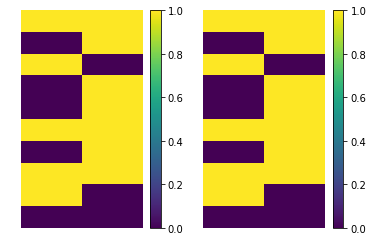

In [8]:
m_est = np.matmul(m_true_rot, o_est)

m_true_plot = np.abs(m_true)
m_true_plot[m_true_plot > .02] = 1
m_true_plot[m_true_plot < .02] = 0

m_est_plot = np.abs(m_est)
m_est_plot[m_est_plot > .02] = 1
m_est_plot[m_est_plot < .02] = 0

cmp_n_mats([m_true_plot, m_est_plot], show_colorbars=True)